In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eig
import pandas as pd
from minisom import MiniSom  
import math
from sklearn.metrics import classification_report
%matplotlib inline

In [103]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


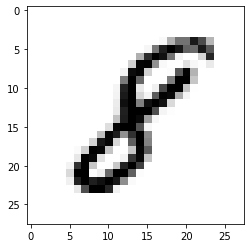

In [3]:
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')


In [78]:
x_train[1].shape

(28, 28)

In [79]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [107]:
w,v=eig(x_train[1])
v.shape
# print('E-vector', v)

(28, 28)

Reshape Data

In [21]:
def morley_reshape(data):
    res = np.reshape(data, (data.shape[0], data.shape[1]*data.shape[2]))
    return(res)

In [101]:
x_test = morley_reshape(x_test)
x_train = morley_reshape(x_train)

In [23]:
print(x_test.shape)
print(x_train.shape)

(10000, 784)
(60000, 784)


Create SOM

In [12]:
som = MiniSom(25, 25, 784, sigma=0.3, learning_rate=0.5) # initialization of 6x6 SOM

In [13]:
som.random_weights_init(x_train)
print("Training...")
som.train_random(x_train,100, verbose=True) # training with 100 iterations
print("...ready!")

Training...
 [ 100 / 100 ] 100% - 0:00:00 left 

/Users/morleypemberton/.pyenv/versions/3.7.3/lib/python3.7/site-packages/minisom.py:486: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)



 quantization error: 2121.099181327279
...ready!


In [14]:
som.distance_map().T

array([[0.28738649, 0.44580042, 0.42486826, 0.51179413, 0.59226887,
        0.55257446, 0.54371841, 0.53293283, 0.47119307, 0.53658542,
        0.48032691, 0.45801623, 0.50794173, 0.56170547, 0.48222696,
        0.48920175, 0.48896094, 0.46791908, 0.49926286, 0.46464569,
        0.50051418, 0.50171845, 0.48940694, 0.43343068, 0.24724218],
       [0.47114427, 0.75681028, 0.7375359 , 0.74142457, 0.74786475,
        0.81737329, 0.90488809, 0.87600378, 0.86860935, 0.7279685 ,
        0.75470344, 0.74911763, 0.8574174 , 0.77467864, 0.92177829,
        0.81809606, 0.67444003, 0.73527576, 0.72800138, 0.76271738,
        0.80696408, 0.88277774, 0.70235009, 0.80549909, 0.45075173],
       [0.47726916, 0.74722683, 0.78931211, 0.77331044, 0.78777179,
        0.74821918, 0.88681339, 0.96168271, 0.80507139, 0.86517822,
        0.9112968 , 0.74603381, 0.76579623, 0.80332181, 0.74540003,
        0.65244162, 0.68447848, 0.71949226, 0.76748783, 0.71208652,
        0.79925673, 0.84512643, 0.74136432, 0.

In [15]:
def classify(som, x_test, x_train, y_train):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = som.labels_map(x_train, y_train)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in x_test:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [16]:
print(classification_report(y_test, classify(som,  x_test, x_train, y_train)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       980
           1       0.88      0.99      0.93      1135
           2       0.92      0.86      0.89      1032
           3       0.86      0.89      0.88      1010
           4       0.81      0.86      0.83       982
           5       0.88      0.83      0.85       892
           6       0.94      0.93      0.93       958
           7       0.88      0.85      0.86      1028
           8       0.90      0.79      0.84       974
           9       0.79      0.78      0.78      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000



In [17]:
pixels_top_10.shape

NameError: name 'pixels_top_10' is not defined

In [ ]:
# so, should we cut up beforehnd? or slide across after? like how do we cut up the pixels
# then we take the classifications from that? or take the winning neuron hmmm.


# ok so we define our kernal granularity in terms of pixels, like 6X6, I want to know how this is 


So what we do is we create a matrix full of sub matricies. Each matrix is a sub region of our image. In the paper that Im looking at they use a kernal size of 10X10 pixels with a stride of 2 so thats what I've set below. This function takes the whole matix when its not flattened and cuts it up into 10 by 10 squares which i can then flatten. 

In [37]:
# cheeky bit of code I've taken from https://medium.com/analytics-vidhya/image-convolution-from-scratch-d99bf639c32a

def get_sub_matrices(orig_matrix, kernel_size): 
    width = len(orig_matrix[0])
    height = len(orig_matrix)
    if kernel_size[0] == kernel_size[1]:
        if kernel_size[0] > 2:
            orig_matrix = np.pad(orig_matrix, kernel_size[0] - 2, mode='constant')
        else: pass
    else: pass
    
    giant_matrix = []
    for i in range(0, height - kernel_size[1] + 1):
        for j in range(0, width - kernel_size[0] + 1):
            giant_matrix.append(
                [
                    [orig_matrix[col][row] for row in range(j, j + kernel_size[0])]
                    for col in range(i, i + kernel_size[1])
                ]
            )
    img_sampling = np.array(giant_matrix)
    return img_sampling

In [53]:
identity_kernel = np.array([[0,0,0],[0,1,0],[0,0,0]])
identity_kernel.shape
(10,10)

(3, 3)

In [96]:
sampled_matrix = get_sub_matrices(x_train[1], (10,10))

Now that I have my sub matricies I'll be passing them through to a number of individual SOM's. Before I do this though I needd to flatten the arrays into a single vector, maybe I should do this in the function above? Nah I dont think so, lets try keep it staged? Thay way if I want to apply some convolutions to the image, maybe instead of using the eigne vectors? I could do that.

This function applies a kernal filter to the image, what does that mean you ask? 
Well we've got our sub regions using the get sub matrices above and using this function here we can 
i guess manipulate those sub regions to try and extract more information from them, one such example is the 
identity kernal,  

In [55]:
def get_transformed_matrix(matrix_sampling, kernel_filter):
    transform_mat = []
    for each_mat in matrix_sampling:
        transform_mat.append(
            np.sum(np.multiply(each_mat, kernel_filter))
        )
    reshape_val = int(math.sqrt(matrix_sampling.shape[0]))
    transform_mat = np.array(transform_mat).reshape(reshape_val, reshape_val)
    return transform_mat

#### Creating a function to flatten our sub matricies
We need to write a function that takes all my sub things and flattens them then returns that?

In [65]:
def flatten_sampled_matrix(matrix_sampling):
    transform_mat = []
    for each_mat in matrix_sampling:
        transform_mat.append(
            np.reshape(each_mat, (each_mat.shape[0], each_mat.shape[1]*each_mat.shape[2]))
        )
    return transform_mat

In [97]:
# x = flatten_sampled_matrix(sampled_matrix)

sampled_matrix_flattened = morley_reshape(sampled_matrix)


# each_mat = sampled_matrix[1]

# print(each_mat.shape)
# print(x_train[1].shape)
# np.reshape(each_mat, (each_mat.shape[0], each_mat.shape[1]*each_mat.shape[2]))



In [98]:
sampled_matrix_flattened.shape

(361, 100)

In [90]:
transformed = get_transformed_matrix(sampled_matrix, identity_kernel)

In [91]:
transformed.shape

(26, 26)

In [92]:
x_train[1].shape

(28, 28)

In [93]:
sampled_matrix

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)